# Preprocessing of Automobile Dataset

1. Getting the Dataset
2. Importing Libraries/Modules
3. Importing Dataset
4. Understanding Dataset
5. Extracting Dependent/Independent Variable(s)
6. Dealing with Missing Values <br>
    a. Impute mising values (for numerical and categorical variables) - SimpleImputer <br>
    b. Drop missing values
7. Handling Features <br>
    a. Numerical Variables (Transform and Binning) <br>
    b. Categorical Variables (Transform and Encoding - OneHotEncoder)
8. Splitting dataset into training and test set
9. Feature Scaling
    a. Normalization
    b. Standardization

## 1. Getting the Dataset

This data set consists of three types of entities:<br> 
    (a) the specification of an auto in terms of various characteristics,<br> 
    (b) its assigned insurance risk rating, <br>
    (c) its normalized losses in use as compared to other cars. 

Note: Several of the attributes in the database could be used as a "class" attribute.

**data info:** https://archive.ics.uci.edu/ml/datasets/Automobile <br>
**data source:** https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

## 2. Importing Libraries / Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer # impute missing values
from sklearn.preprocessing import OneHotEncoder # encode categorical variables
from sklearn.model_selection import train_test_split # split data into train set and test set
from sklearn.preprocessing import MinMaxScaler # normalize data



## 3. Importing Dataset

In [2]:
url_data='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

header=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
         'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type',
         'num-of-cylinders', 'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
         'peak-rpm','city-mpg','highway-mpg','price']


df_raw=pd.read_csv(url_data,header=None, names=header, na_values='?')

# make copy
df=df_raw.copy()

In [3]:
# run the first 5 rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## 4. Understanding Dataset

In [4]:
# get number of samples and feature
df.shape

(205, 26)

In [5]:
# get feature names
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# get information about features (dtype, non-null values, memory usage)
df.info()
# get information about type of features
# df.dtypes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# convert data types to proper format
# change type of symboling (it's more categorical-ordinal variable then intiger)
df.symboling=df.symboling.astype('object')

In [8]:
# numerical features 
df.select_dtypes(include=['float64','int64']).columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [9]:
# categorical features
df.select_dtypes(include=['object']).columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'],
      dtype='object')

In [10]:
# summary statistics
#df.describe(include='all').T # include all variables
df.describe() # include only numerical variables

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


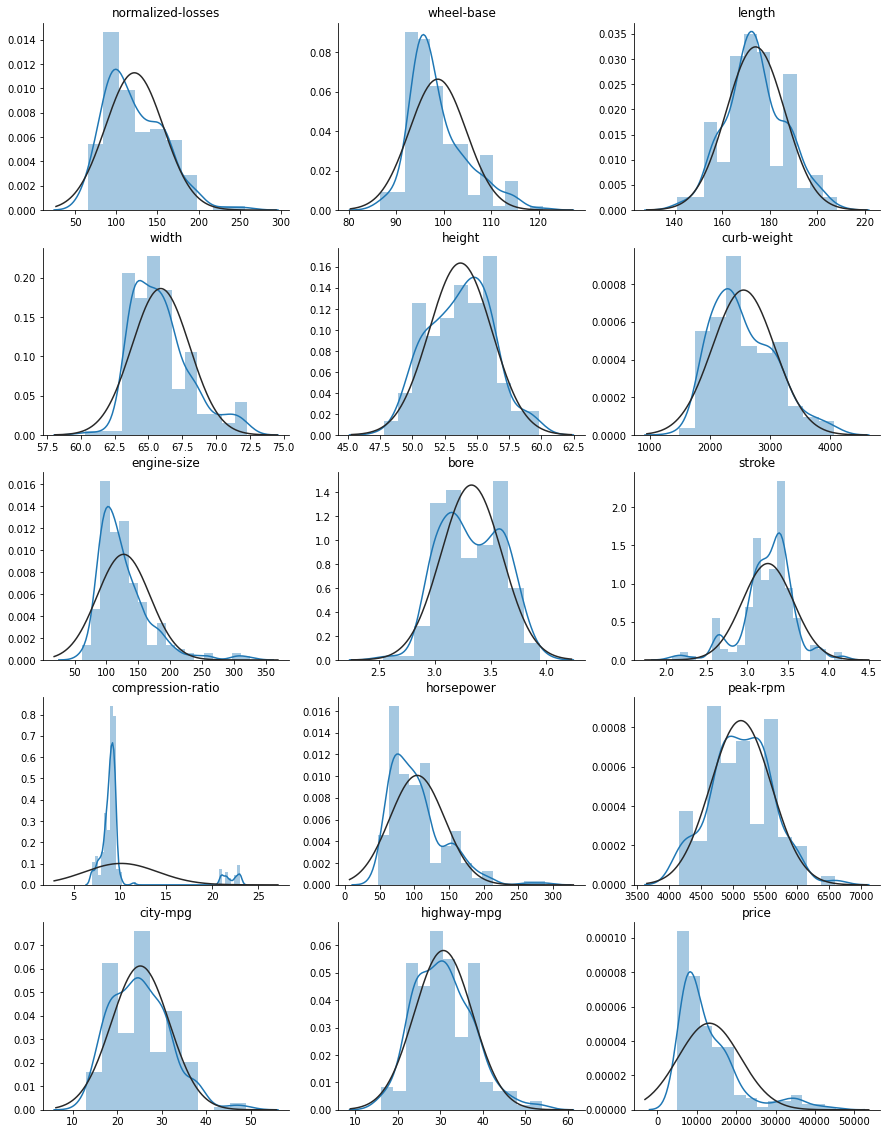

In [11]:
# visualization of numerical variables 
# distribution 
from scipy.stats import norm

fig = plt.figure(figsize=(15,20))
subCnt = 1     # initialize plot number
for i in df.select_dtypes(include=['float64','int64']).columns:
    fig.add_subplot(5, 3, subCnt)
    sns.distplot(df[i],fit=norm).set(xlabel='',ylabel='',title=i)
    sns.despine()
    subCnt = subCnt + 1
plt.show()

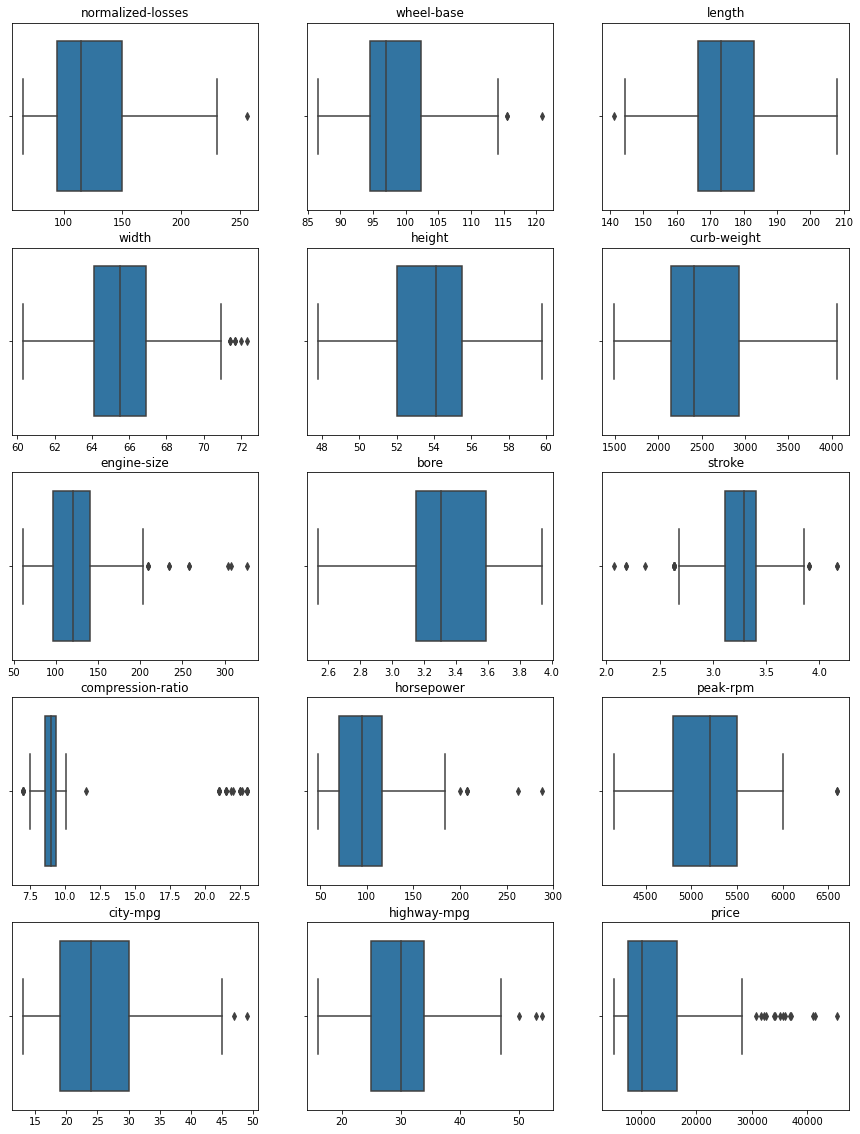

In [12]:
# Visualization of numerical variables
# representation of central tendency and dispersion
# detect outliers
fig = plt.figure(figsize=(15,20))
subCnt = 1     # initialize plot number
for i in df.select_dtypes(include=['float64','int64']).columns:
    fig.add_subplot(5, 3, subCnt)
    sns.boxplot(df[i]).set(xlabel='',ylabel='',title=i)
    subCnt = subCnt + 1
plt.show()

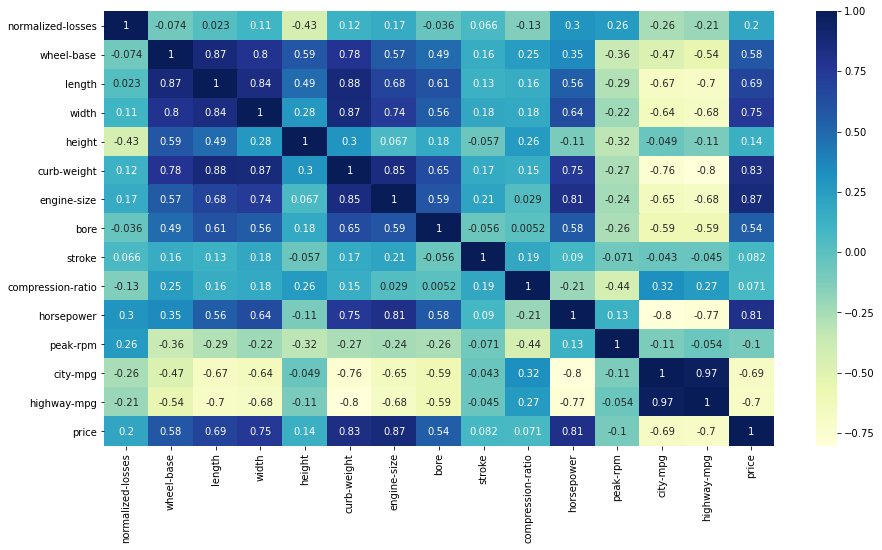

In [13]:
# correlation matrix
df.corr()

# heatmap of correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [14]:
# correlation with target value-price
df.corr().iloc[-1]

normalized-losses    0.203254
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

- high positive correlation: Price with engine-size, curb-weight, horsepower, width
- high negative correlation: Price with city-mpg, highway-mpg.<br>
Also we could think about dropping some features.

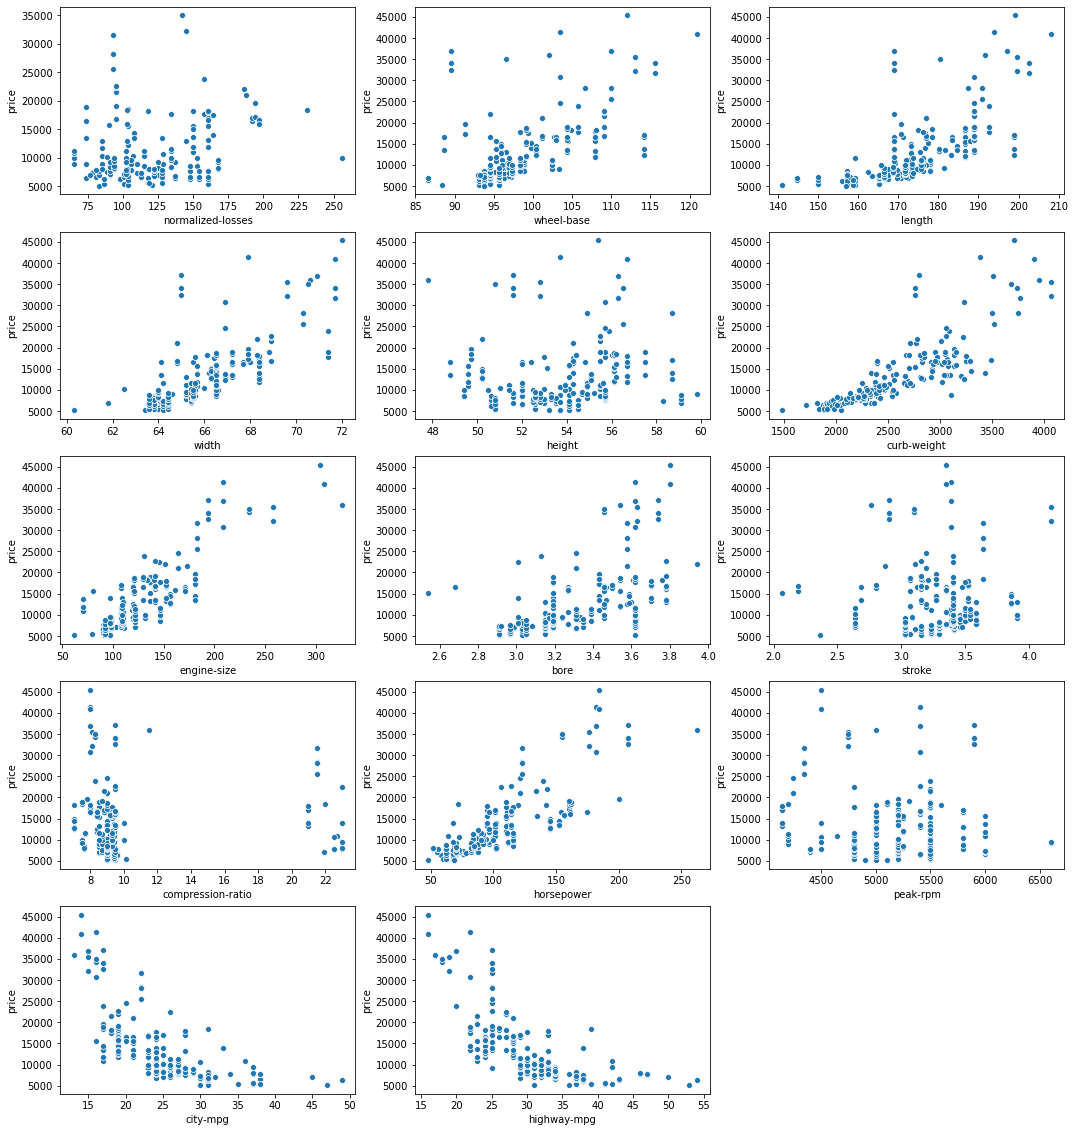

In [15]:
# visualization Price vs other numerical variable 
fig = plt.figure(figsize=(18,20))
subCnt = 1     # initialize plot number
for i in df.select_dtypes(include=['float64','int64']).columns[:-1]:
    fig.add_subplot(5, 3, subCnt)
    sns.scatterplot(x=df[i],y=df['price'])
    subCnt = subCnt + 1
plt.show()

In [16]:
# detect missing values
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

7 columns containing missing data:

- normalized-losses: 41 missing data
- num-of-doors: 2 missing data
- bore: 4 missing data
- stroke: 4 missing data
- horsepower: 2 missing data
- peak-rpm: 2 missing data
- price: 4 missing data

Missing values in numerical variables we replace with median (because of skewed density curve, outliers - see above visualization of numerical variables).<br>
Only one categorical da

In [17]:
# rows with missing values in 'num-of-doors'
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


it makes sense to replace with four, because sedan usually has four doors.  

In [18]:
# look at frequency of num-of-doors 
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
# the most common type (value that is imputed)
df['num-of-doors'].value_counts().idxmax()

'four'

## 5. Extracting Dependent/Independent Variable

In [20]:
# extracting dependent variable - price
df_y= df.iloc[:,-1]

In [21]:
# extracting independent variables - all other
df_X= df.iloc[:,:-1]

## 6. Dealing with Missing Values

So, when we identify missing data what could we do? 
1. replace by some other value (mean,median (numerical variables) or mode-the most frequent value(categorical variable))
2. drop row(s) or column(s)
3. ignore

### a. Impute Missing Values

#### Numerical variables

In [22]:
# impute median with Simple imputer
# use median which is robust against outliers, whereas the mean actually is sensitive to outliers

num_col_miss=['normalized-losses','bore','stroke', 'horsepower', 'peak-rpm'] # numerical feature with missing values

#from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
df_X[num_col_miss]=imputer.fit_transform(df_X[num_col_miss])

In [23]:
df_X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


#### Categorical variables

In [24]:
# Impute mode-the most frequent value

#from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_X['num-of-doors']=imputer.fit_transform(df_X[['num-of-doors']])

### b. Drop Missing Values

In [25]:
# where we have missing values in target variable - price
df_y[df_y.isnull()]

9     NaN
44    NaN
45    NaN
129   NaN
Name: price, dtype: float64

In [26]:
# drop the row (observation, sample) with NaN from target value
df_y=df_y.dropna() # to modify the df_y

# Why 'price' column? 
# a. only 4 observations missing
# b. price is what we want to predict (so, row without price data is not useful) 

In [27]:
# drop rows from X where y had missing values
df_X.drop(index=[9,44,45,129],axis=0, inplace=True)

In [28]:
# reset index (4 rows are dropped) 
df_y.reset_index(drop=True,inplace=True)
df_X.reset_index(drop=True,inplace=True)

In [29]:
# drop the column
# a. if most entries are empty
# b. that atribute is unnecesarry


# So, in this point we don't have a reason to do that 

In [30]:
print(df_X.shape)
print(df_y.shape)

(201, 25)
(201,)


## 7. Handling Features

### a. Numerical Variables

In [31]:
# dataset that include only independent numerical variables
df_X_numerical=df_X.select_dtypes(include=['float64','int64']).copy()

In [32]:
# names of numerical features
df_X_numerical.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

#### Transform

In [33]:
# bringing data into a common standard of expression that allows users to easy understand or make meaningful comparisons

# convert car fuel consumption in miles per gallon (mpg) to L/100km to be integer
# variable city-mpg 
df_X_numerical['city-L/100km'] = 235.214589/df_X_numerical['city-mpg']
df_X_numerical['city-L/100km']=df_X_numerical['city-L/100km'].astype(int)

In [34]:
# convert car fuel consumption in miles per gallon (mpg) to L/100km to be integer
# variable highway-mpg 

df_X_numerical['highway-L/100km'] = df_X_numerical['highway-mpg'].apply(lambda x: 235.214589/x)
df_X_numerical['highway-L/100km']=df_X_numerical['highway-L/100km'].astype(int)

In [35]:
# convert engine-size from cubic inches to cubic centimeters (cc) 
df_X_numerical['engine_size_cc'] = df_X_numerical['engine-size'].apply(lambda x: int(x/0.061024))

In [36]:
# remove unnecessary variables (city-mpg,highway-mpg)
df_X_numerical.drop(columns=['city-mpg','highway-mpg','engine-size'], inplace=True)

In [37]:
df_X_numerical

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,engine_size_cc
0,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,11,8,2130
1,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,11,8,2130
2,115.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,12,9,2490
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,9,7,1786
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,13,10,2228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114.0,5400.0,10,8,2310
197,95.0,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160.0,5300.0,12,9,2310
198,95.0,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134.0,5500.0,13,10,2834
199,95.0,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106.0,4800.0,9,8,2376


#### Binning

- or discretization is the process of transforming numerical variables into categorical

In [38]:
# as an example - we discretize target variable price

# summary statistics
df_y.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

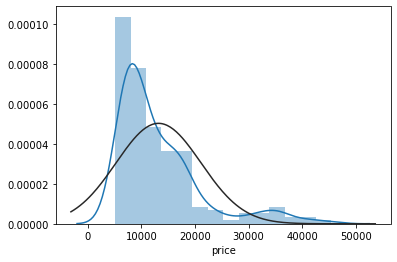

In [39]:
# distribution of price
sns.distplot(df_y, fit=norm)

Text(0.5, 1.0, 'Price bins')

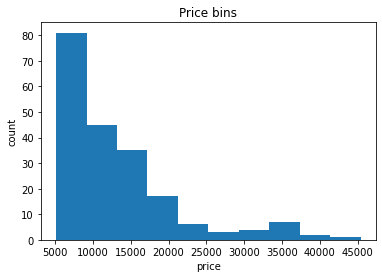

In [40]:
# histogram for price
plt.hist(df_y)
plt.xlabel('price')
plt.ylabel('count') 
plt.title('Price bins')

##### Equal width binning

In [41]:
# width of interval
binwidth=int((df_y.max()-df_y.min())/5) # column will contain 4 category -Low,Medium,High,Very High
binwidth

8056

In [42]:
# bins
bins=np.linspace(df_y.min(),df_y.max(),5)
bins

array([ 5118. , 15188.5, 25259. , 35329.5, 45400. ])

In [43]:
# discretize target variable
df_y_binned = pd.cut(df_y, bins, labels=['Low','Medium','High','Very High'], include_lowest=True)

In [44]:
# number of observation in each bin
df_y_binned.value_counts()

Low          140
Medium        44
High          10
Very High      7
Name: price, dtype: int64

[Text(0.5, 1.0, 'Price_binned')]

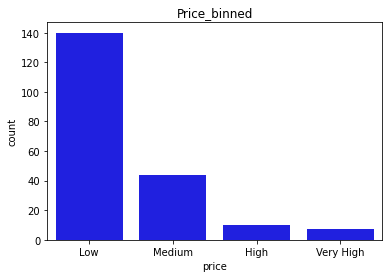

In [45]:
# visualize discretizied variable 
sns.countplot(df_y_binned, color='b').set(title='Price_binned')

##### Equal-frequency bins

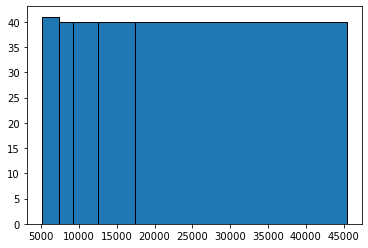

(array([ 5118. ,  7358.2,  9150.2, 12553.4, 17399.8, 45400. ]),
 array([41., 40., 40., 40., 40.]))

In [46]:
# define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(df_y, equalObs(df_y,5), edgecolor='black') # try different number of bins 
plt.show()

#display bin boundaries and frequency per bin 
bins, n

### b. Categorical Variables

In [47]:
# work only with categorical features
df_X_categorical = df_X.select_dtypes(include=['object']).copy()

In [48]:
# name of categorical columns
df_X_categorical.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'],
      dtype='object')

In [49]:
# detect labels in categorical variables
for col in df_X_categorical.columns:
    print(col, np.unique(df_X[col]))

symboling [-2 -1 0 1 2 3]
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['diesel' 'gas']
aspiration ['std' 'turbo']
num-of-doors ['four' 'two']
body-style ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
drive-wheels ['4wd' 'fwd' 'rwd']
engine-location ['front' 'rear']
engine-type ['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
num-of-cylinders ['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
fuel-system ['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


In [50]:
# number of values in column make
df_X_categorical['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

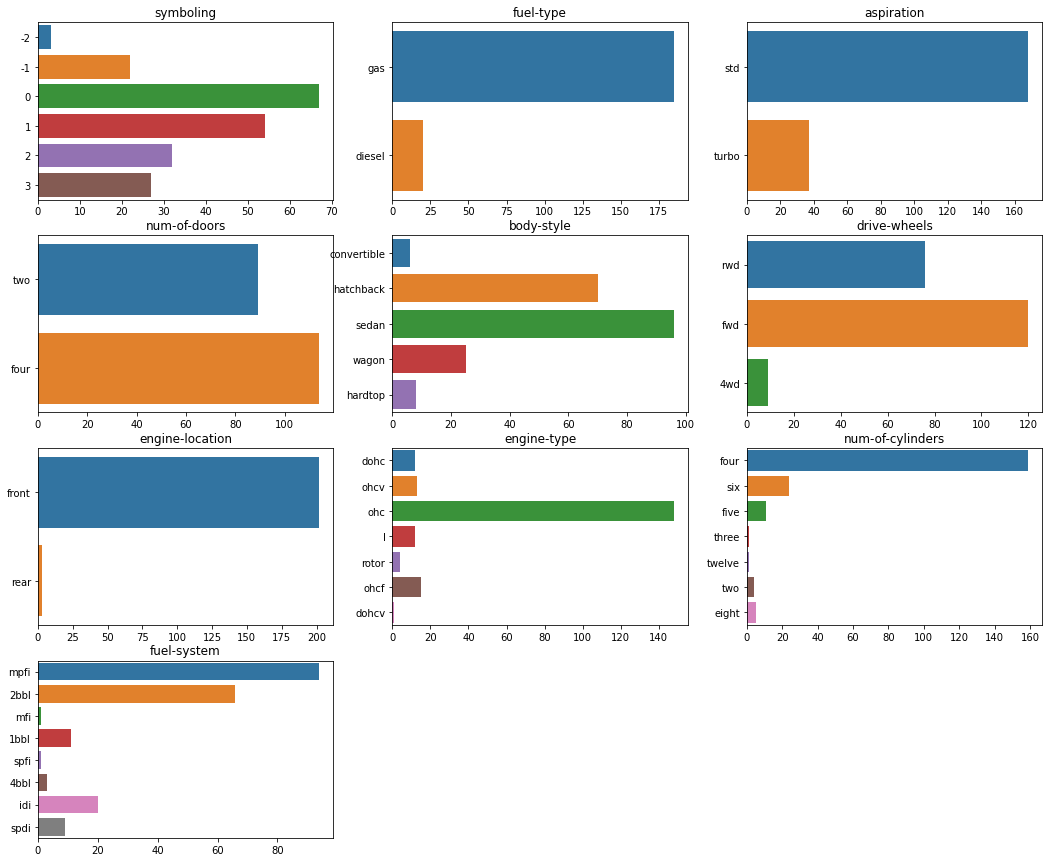

In [51]:
# visualization of other categorical columns
fig = plt.figure(figsize=(18,15))
subCnt = 1     # initialize plot number
for i in df_X_categorical.columns.drop('make'):
    fig.add_subplot(4, 3, subCnt)
    sns.countplot(y=i,data=df).set(xlabel='',ylabel='',title=i)
    subCnt = subCnt + 1
plt.show()

#### Transform

In [52]:
# ordinal features - change categories 
# -2,-1,0 -> safe and 1,2,3 -> risky (from insurance poit of view)
df_X_categorical['symboling']=df_X_categorical['symboling'].apply(lambda x: 'safe' if (x<=0) else 'risky')

In [53]:
# number of cars in each category
df_X_categorical['symboling'].value_counts()

risky    111
safe      90
Name: symboling, dtype: int64

In [54]:
# nominal features - change categories
# energy-type with ohc in word -> OHC and other -> noOHC
df_X_categorical['engine-type'] = np.where(df_X_categorical['engine-type'].str.contains('ohc'), 'OHC', 'noOHC')

In [55]:
# number of cars in each category
df_X_categorical['engine-type'].value_counts()

OHC      185
noOHC     16
Name: engine-type, dtype: int64

In [56]:
df_X_categorical

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,risky,alfa-romero,gas,std,two,convertible,rwd,front,OHC,four,mpfi
1,risky,alfa-romero,gas,std,two,convertible,rwd,front,OHC,four,mpfi
2,risky,alfa-romero,gas,std,two,hatchback,rwd,front,OHC,six,mpfi
3,risky,audi,gas,std,four,sedan,fwd,front,OHC,four,mpfi
4,risky,audi,gas,std,four,sedan,4wd,front,OHC,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
196,safe,volvo,gas,std,four,sedan,rwd,front,OHC,four,mpfi
197,safe,volvo,gas,turbo,four,sedan,rwd,front,OHC,four,mpfi
198,safe,volvo,gas,std,four,sedan,rwd,front,OHC,six,mpfi
199,safe,volvo,diesel,turbo,four,sedan,rwd,front,OHC,six,idi


#### Encoding 

In [57]:
# nominal feature encoding - OneHotEncoder
# for columns all catgorial columns

#from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df_X_categorical_encoded = pd.DataFrame(ohe.fit_transform(df_X_categorical).toarray())

In [58]:
df_X_categorical_encoded.columns=ohe.get_feature_names()

In [59]:
df_X_categorical_encoded

,x0_risky,x0_safe,x1_alfa-romero,x1_audi,x1_bmw,x1_chevrolet,x1_dodge,x1_honda,x1_isuzu,x1_jaguar,...,x9_twelve,x9_two,x10_1bbl,x10_2bbl,x10_4bbl,x10_idi,x10_mfi,x10_mpfi,x10_spdi,x10_spfi
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
# merge numerical part and encoded categorical part in df_X
df_X=pd.concat([df_X_numerical, df_X_categorical_encoded], axis=1)

In [61]:
df_X

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,...,x9_twelve,x9_two,x10_1bbl,x10_2bbl,x10_4bbl,x10_idi,x10_mfi,x10_mpfi,x10_spdi,x10_spfi
0,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,115.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,115.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,95.0,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,95.0,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,95.0,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 8. Splitting dataset into training and test set

In [62]:
# split into train and test

X, y = df_X.values, df_y.values

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=0)

In [63]:
# dimensions of each set
print(X_train.shape) 
print(X_test.shape)

(140, 71)
(61, 71)


## 9. Feature Scaling

### a. Normalization

- data is scaled to a fixed range [0,1]

In [64]:
# Normalization of training and test set

#from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [65]:
X_test_norm

array([[0.17277487, 0.2303207 , 0.22089552, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4606414 , 0.51492537, ..., 0.        , 0.        ,
        0.        ],
       [0.2617801 , 0.80466472, 0.86268657, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10471204, 0.28862974, 0.5119403 , ..., 1.        , 0.        ,
        0.        ],
       [0.33507853, 0.35568513, 0.54776119, ..., 0.        , 0.        ,
        0.        ],
       [0.20418848, 0.36443149, 0.67910448, ..., 1.        , 0.        ,
        0.        ]])

In [66]:
# normalization of target variable
y_train_norm=mms.fit_transform(y_train.reshape(-1, 1)) # reshape(-1, 1) when contains 1 column
y_test_norm = mms.transform(y_test.reshape(-1, 1))

In [67]:
# mean and standard deviation of feature in training set

mean_X_train_norm=X_train_norm.mean(axis=0)
# or np.mean(X_train_norm, axis=0)

std_X_train_norm=X_train_norm.std(axis=0)
# or np.std(X_train_norm, axis=0)

print(f'Mean :',mean_X_train_norm,  '\n \nStandard deviation:', std_X_train_norm)

Mean : [0.29424084 0.35370679 0.49090618 0.48433584 0.48767857 0.42557154
 0.58609694 0.61725146 0.17496429 0.25660881 0.3951895  0.38571429
 0.35357143 0.2429328  0.53571429 0.46428571 0.02142857 0.01428571
 0.04285714 0.01428571 0.04285714 0.06428571 0.01428571 0.00714286
 0.08571429 0.04285714 0.00714286 0.06428571 0.11428571 0.05
 0.04285714 0.         0.01428571 0.02142857 0.06428571 0.15714286
 0.03571429 0.07857143 0.07142857 0.92857143 0.82142857 0.17857143
 0.56428571 0.43571429 0.02142857 0.02857143 0.37142857 0.47142857
 0.10714286 0.03571429 0.57142857 0.39285714 0.         0.
 0.92142857 0.07857143 0.02142857 0.03571429 0.8        0.10714286
 0.00714286 0.00714286 0.02142857 0.05714286 0.34285714 0.02142857
 0.07142857 0.00714286 0.43571429 0.05714286 0.00714286] 
 
Standard deviation: [0.17629203 0.1705599  0.17725708 0.18141083 0.20515545 0.20694264
 0.23204735 0.17732118 0.2158101  0.16857948 0.18926083 0.17450471
 0.17501458 0.14988733 0.49872286 0.49872286 0.14480811 

### Standardization

- or Z-score normalization means centering the variable at 0 and standardizing the variance at 1

In [68]:
# Standardization
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
X_train_stand = stand.fit_transform(X_train)
X_test_stand = stand.transform(X_test)

In [69]:
X_train_stand

array([[-0.45141663, -0.2618956 , -0.04973923, ..., -0.87872174,
        -0.24618298, -0.08481889],
       [-0.80779817, -0.24480218, -0.19288237, ...,  1.13801668,
        -0.24618298, -0.08481889],
       [-1.19387818, -0.72341791, -1.27908619, ..., -0.87872174,
        -0.24618298, -0.08481889],
       ...,
       [ 0.97410956, -0.86016526, -1.40538896, ..., -0.87872174,
        -0.24618298, -0.08481889],
       [-0.51081355, -0.96272577, -1.25382564, ..., -0.87872174,
        -0.24618298, -0.08481889],
       [-1.66905358,  0.62696219,  0.13550483, ...,  1.13801668,
        -0.24618298, -0.08481889]])

In [70]:
# Standardization of target variable
y_train_stand=stand.fit_transform(y_train.reshape(-1, 1)) # reshape(-1, 1) when contains 1 column
y_test_stand=stand.transform(y_test.reshape(-1, 1))

In [71]:
# mean and standard deviation of feature in training set

mean_X_train_stand=X_train_stand.mean(axis=0)
# or np.mean(X_train_stand, axis=0)

std_X_train_stand=X_train_stand.std(axis=0)
# or np.std(X_train_stand, axis=0)

print(f'Mean :',mean_X_train_stand,  '\n \nStandard deviation:', std_X_train_stand)

Mean : [-6.34413157e-17 -6.57410634e-16  6.87604735e-15  1.41513785e-15
 -1.38159325e-14  1.94090775e-16 -6.29407241e-15  5.02455220e-15
 -3.46151679e-16  1.00713089e-16  8.02532644e-16 -1.18159450e-16
  1.08643253e-16 -1.36894464e-16  3.48927236e-17 -3.48927236e-17
 -8.04911693e-17 -1.14789131e-16  5.90797252e-17 -1.27080885e-16
 -5.94762335e-18 -1.52259158e-16 -2.71608133e-17  1.52259158e-16
 -8.04911693e-17 -3.56857401e-18  1.39372640e-16  4.12368552e-17
  1.08643253e-16  3.13241496e-17  1.22917549e-16  0.00000000e+00
  3.19189120e-17 -1.64154404e-16  2.22044605e-16 -1.14194368e-16
  1.14194368e-16 -2.45835098e-17  8.64387926e-17 -1.41949944e-16
 -6.97854473e-17  9.91270558e-17 -1.37191845e-16  1.37191845e-16
 -1.05867696e-16  8.88178420e-17  9.04038749e-17  9.51619735e-18
  7.93016446e-19  6.14587746e-17 -1.04678171e-16  6.02692499e-17
  0.00000000e+00  0.00000000e+00  1.68912503e-16  8.56457762e-17
 -7.65260871e-17  1.94289029e-17 -1.64947421e-16 -6.02692499e-17
  7.31557672e-17  